## Importing required libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data preprocessing -> for this i am using the keras library in tensorflow

### Training image preprocessing 

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validating image preprocessing

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [8]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [10]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[173.5  169.5  169.5 ]
   [177.5  172.25 179.5 ]
   [178.5  170.5  183.5 ]
   ...
   [125.5  119.5  123.5 ]
   [141.5  135.5  139.5 ]
   [140.75 134.75 138.75]]

  [[171.75 167.75 167.75]
   [174.   169.   174.5 ]
   [176.   168.   180.  ]
   ...
   [148.75 142.75 146.75]
   [133.5  127.5  131.5 ]
   [134.25 128.25 132.25]]

  [[180.75 176.25 178.75]
   [177.5  172.5  177.5 ]
   [174.75 169.75 176.5 ]
   ...
   [141.5  135.5  139.5 ]
   [147.25 141.25 145.25]
   [114.   108.   112.  ]]

  ...

  [[127.5  122.5  128.5 ]
   [123.75 118.75 124.75]
   [128.   123.   129.  ]
   ...
   [ 43.5   34.25  31.5 ]
   [ 99.    85.5   88.  ]
   [104.75  85.5   86.75]]

  [[131.25 126.25 132.25]
   [126.25 121.25 127.25]
   [131.75 126.75 132.75]
   ...
   [ 62.75  49.    39.25]
   [ 46.5   34.    37.  ]
   [ 99.    81.    87.  ]]

  [[126.75 121.75 127.75]
   [120.75 115.75 121.75]
   [126.75 121.75 127.75]
   ...
   [ 30.75  14.75   8.75]
   [ 21.     7.75  11.5 ]
   [ 90.25  72.75  8

The 32 here represents the number of images that will pass to the model in one itration and this is equal to the batch size of sets that is written above.

## Model Architecture

-first importing the required libraries

### To avoid overshooting:
1.  choose the small learning rate, by default its 0.001 and i am using 0.0001 here, this will help in solving the problem of overshooting
3. so there maybe some problem of underfitting to avoid that i increased the number of neurons used(earlier its 1024 and now i am using 1500) Its just hit and try , i get good result after puting 1500 neurons.
4. Adding more number of convolutional layers helps in extracting more features from the images, as there may be some posibilites that model is not able to capture relevent number of features and it maybe confused due to lack of features    

In [16]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten, Dropout
from tensorflow.keras.models import Sequential

In [18]:
model = Sequential()

In [20]:
## As the CNNs model basically consist of 3 layers(Convulation , Pooling and fully connected) , i will write them one by one below

In [22]:
## Convolutional layer
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))

## pooling layer
model.add(MaxPool2D(pool_size=2,strides=2))

In [24]:
## Convolutional layer
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

## pooling layer
model.add(MaxPool2D(pool_size=2,strides=2))

In [26]:
## Convolutional layer
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))

## pooling layer
model.add(MaxPool2D(pool_size=2,strides=2))

In [28]:
## Convolutional layer
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))

## pooling layer
model.add(MaxPool2D(pool_size=2,strides=2))

In [30]:
## Convolutional layer
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))

## pooling layer
model.add(MaxPool2D(pool_size=2,strides=2))

In [32]:
## to avoid overfitting i am using dropout here
model.add(Dropout(0.25))

In [34]:
## fully connected -> flattened layer
model.add(Flatten())

In [36]:
## dense layer -> its hidden and define the number of nurons for the faltten layer
model.add(Dense(units=1500,activation='relu'))

In [38]:
model.add(Dropout(0.4))

In [40]:
## Output Layer
model.add(Dense(units=38,activation='softmax'))

## Compiling Model

In [43]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

## Training the model

In [49]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=6) 

Epoch 1/6
2197/2197 [==============================] - 3488s 2s/step - loss: 1.3787 - accuracy: 0.5959 - val_loss: 0.4408 - val_accuracy: 0.8623
Epoch 2/6
2197/2197 [==============================] - 1759s 801ms/step - loss: 0.4409 - accuracy: 0.8597 - val_loss: 0.3719 - val_accuracy: 0.8805
Epoch 3/6
2197/2197 [==============================] - 1850s 842ms/step - loss: 0.2697 - accuracy: 0.9125 - val_loss: 0.2834 - val_accuracy: 0.9117
Epoch 4/6
2197/2197 [==============================] - 1953s 889ms/step - loss: 0.1859 - accuracy: 0.9393 - val_loss: 0.2159 - val_accuracy: 0.9293
Epoch 5/6
2197/2197 [==============================] - 1849s 842ms/step - loss: 0.1429 - accuracy: 0.9523 - val_loss: 0.1576 - val_accuracy: 0.9487
Epoch 6/6
2197/2197 [==============================] - 1902s 866ms/step - loss: 0.1043 - accuracy: 0.9651 - val_loss: 0.1610 - val_accuracy: 0.9500


## Model Evaluation

In [53]:
# evalutaing the model in training set
training_loss, train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 434s 197ms/step - loss: 0.0669 - accuracy: 0.9771


In [55]:
print('Training loss:', training_loss, 'Training accuracy:' ,train_acc)

Traininf loss: 0.06692972779273987 Training accuracy: 0.9770680665969849


In [57]:
# evaluating model on validation set
validation_loss, validation_acc = model.evaluate(validation_set)

550/550 [==============================] - 110s 199ms/step - loss: 0.1610 - accuracy: 0.9500


In [59]:
print('Validation loss:', validation_loss, 'Validation accuracy:' ,validation_acc)

Validation loss: 0.16099248826503754 Validation accuracy: 0.9500341415405273


### Saving model

In [63]:
model.save('Trained_Model.h5')

/opt/anaconda3/envs/tensorflow_env/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [65]:
model.save('Trained_Model.keras')

In [68]:
training_history.history

{'loss': [1.3786605596542358,
  0.4408886730670929,
  0.26971083879470825,
  0.18588796257972717,
  0.14287707209587097,
  0.1042928621172905],
 'accuracy': [0.5959314107894897,
  0.8596770763397217,
  0.912497341632843,
  0.9392560124397278,
  0.9523294568061829,
  0.9650615453720093],
 'val_loss': [0.4407597482204437,
  0.3718913793563843,
  0.2833743095397949,
  0.21587419509887695,
  0.15758953988552094,
  0.16099247336387634],
 'val_accuracy': [0.8623378276824951,
  0.8805485963821411,
  0.9117345809936523,
  0.9292624592781067,
  0.948668360710144,
  0.9500341415405273]}

### RECORDING training history in json format

In [72]:
import json
with open('training_history.json','w') as f:
    json.dump(training_history.history,f)

## Accuracy visualization

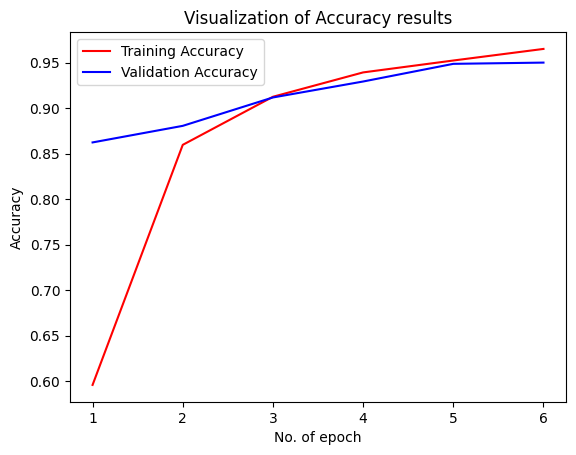

In [80]:
epoch = [i for i in range(1,7)]
plt.plot(epoch, training_history.history['accuracy'], color='red',label='Training Accuracy')
plt.plot(epoch, training_history.history['val_accuracy'], color='blue',label='Validation Accuracy')
plt.xlabel('No. of epoch')
plt.ylabel('Accuracy')
plt.title('Visualization of Accuracy results')
plt.legend()
plt.show()

### evaluation on other metrices
1. precision
2. recall
3. f1-score

In [84]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [87]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [89]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 [==============================] - 95s 172ms/step


(array([[9.9991572e-01, 1.6639039e-07, 1.8216135e-09, ..., 3.4286641e-13,
         1.5151453e-12, 6.0430307e-12],
        [9.9293339e-01, 3.1809366e-06, 6.4694876e-09, ..., 5.2723569e-11,
         4.7036101e-11, 2.6045419e-10],
        [9.9999940e-01, 5.3394615e-07, 1.2720330e-09, ..., 4.5676594e-14,
         7.4652905e-12, 1.5528790e-11],
        ...,
        [4.1980912e-09, 2.4815658e-10, 2.8434121e-08, ..., 3.7407721e-10,
         5.4136978e-10, 9.9999166e-01],
        [1.3900810e-08, 6.4519345e-10, 3.4983933e-07, ..., 2.1954250e-09,
         2.7449067e-09, 9.9998415e-01],
        [1.5823436e-17, 1.0210189e-16, 5.8988721e-15, ..., 9.5538262e-17,
         1.6563695e-13, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [91]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [93]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [95]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [97]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [100]:
from sklearn.metrics import classification_report, confusion_matrix

In [102]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.91      0.93       504
                                 Apple___Black_rot       0.93      1.00      0.96       497
                          Apple___Cedar_apple_rust       0.96      0.98      0.97       440
                                   Apple___healthy       0.96      0.94      0.95       502
                               Blueberry___healthy       0.97      0.96      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.94      0.96       421
                 Cherry_(including_sour)___healthy       0.95      0.99      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.81      0.88       410
                       Corn_(maize)___Common_rust_       0.99      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.85      0.99      0.

In [104]:
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[461,   8,   0, ...,   0,   0,   0],
       [  0, 495,   0, ...,   0,   0,   0],
       [  0,   0, 431, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 485,   0,   0],
       [  0,   0,   0, ...,   0, 447,   0],
       [  2,   0,   2, ...,   0,   0, 476]])

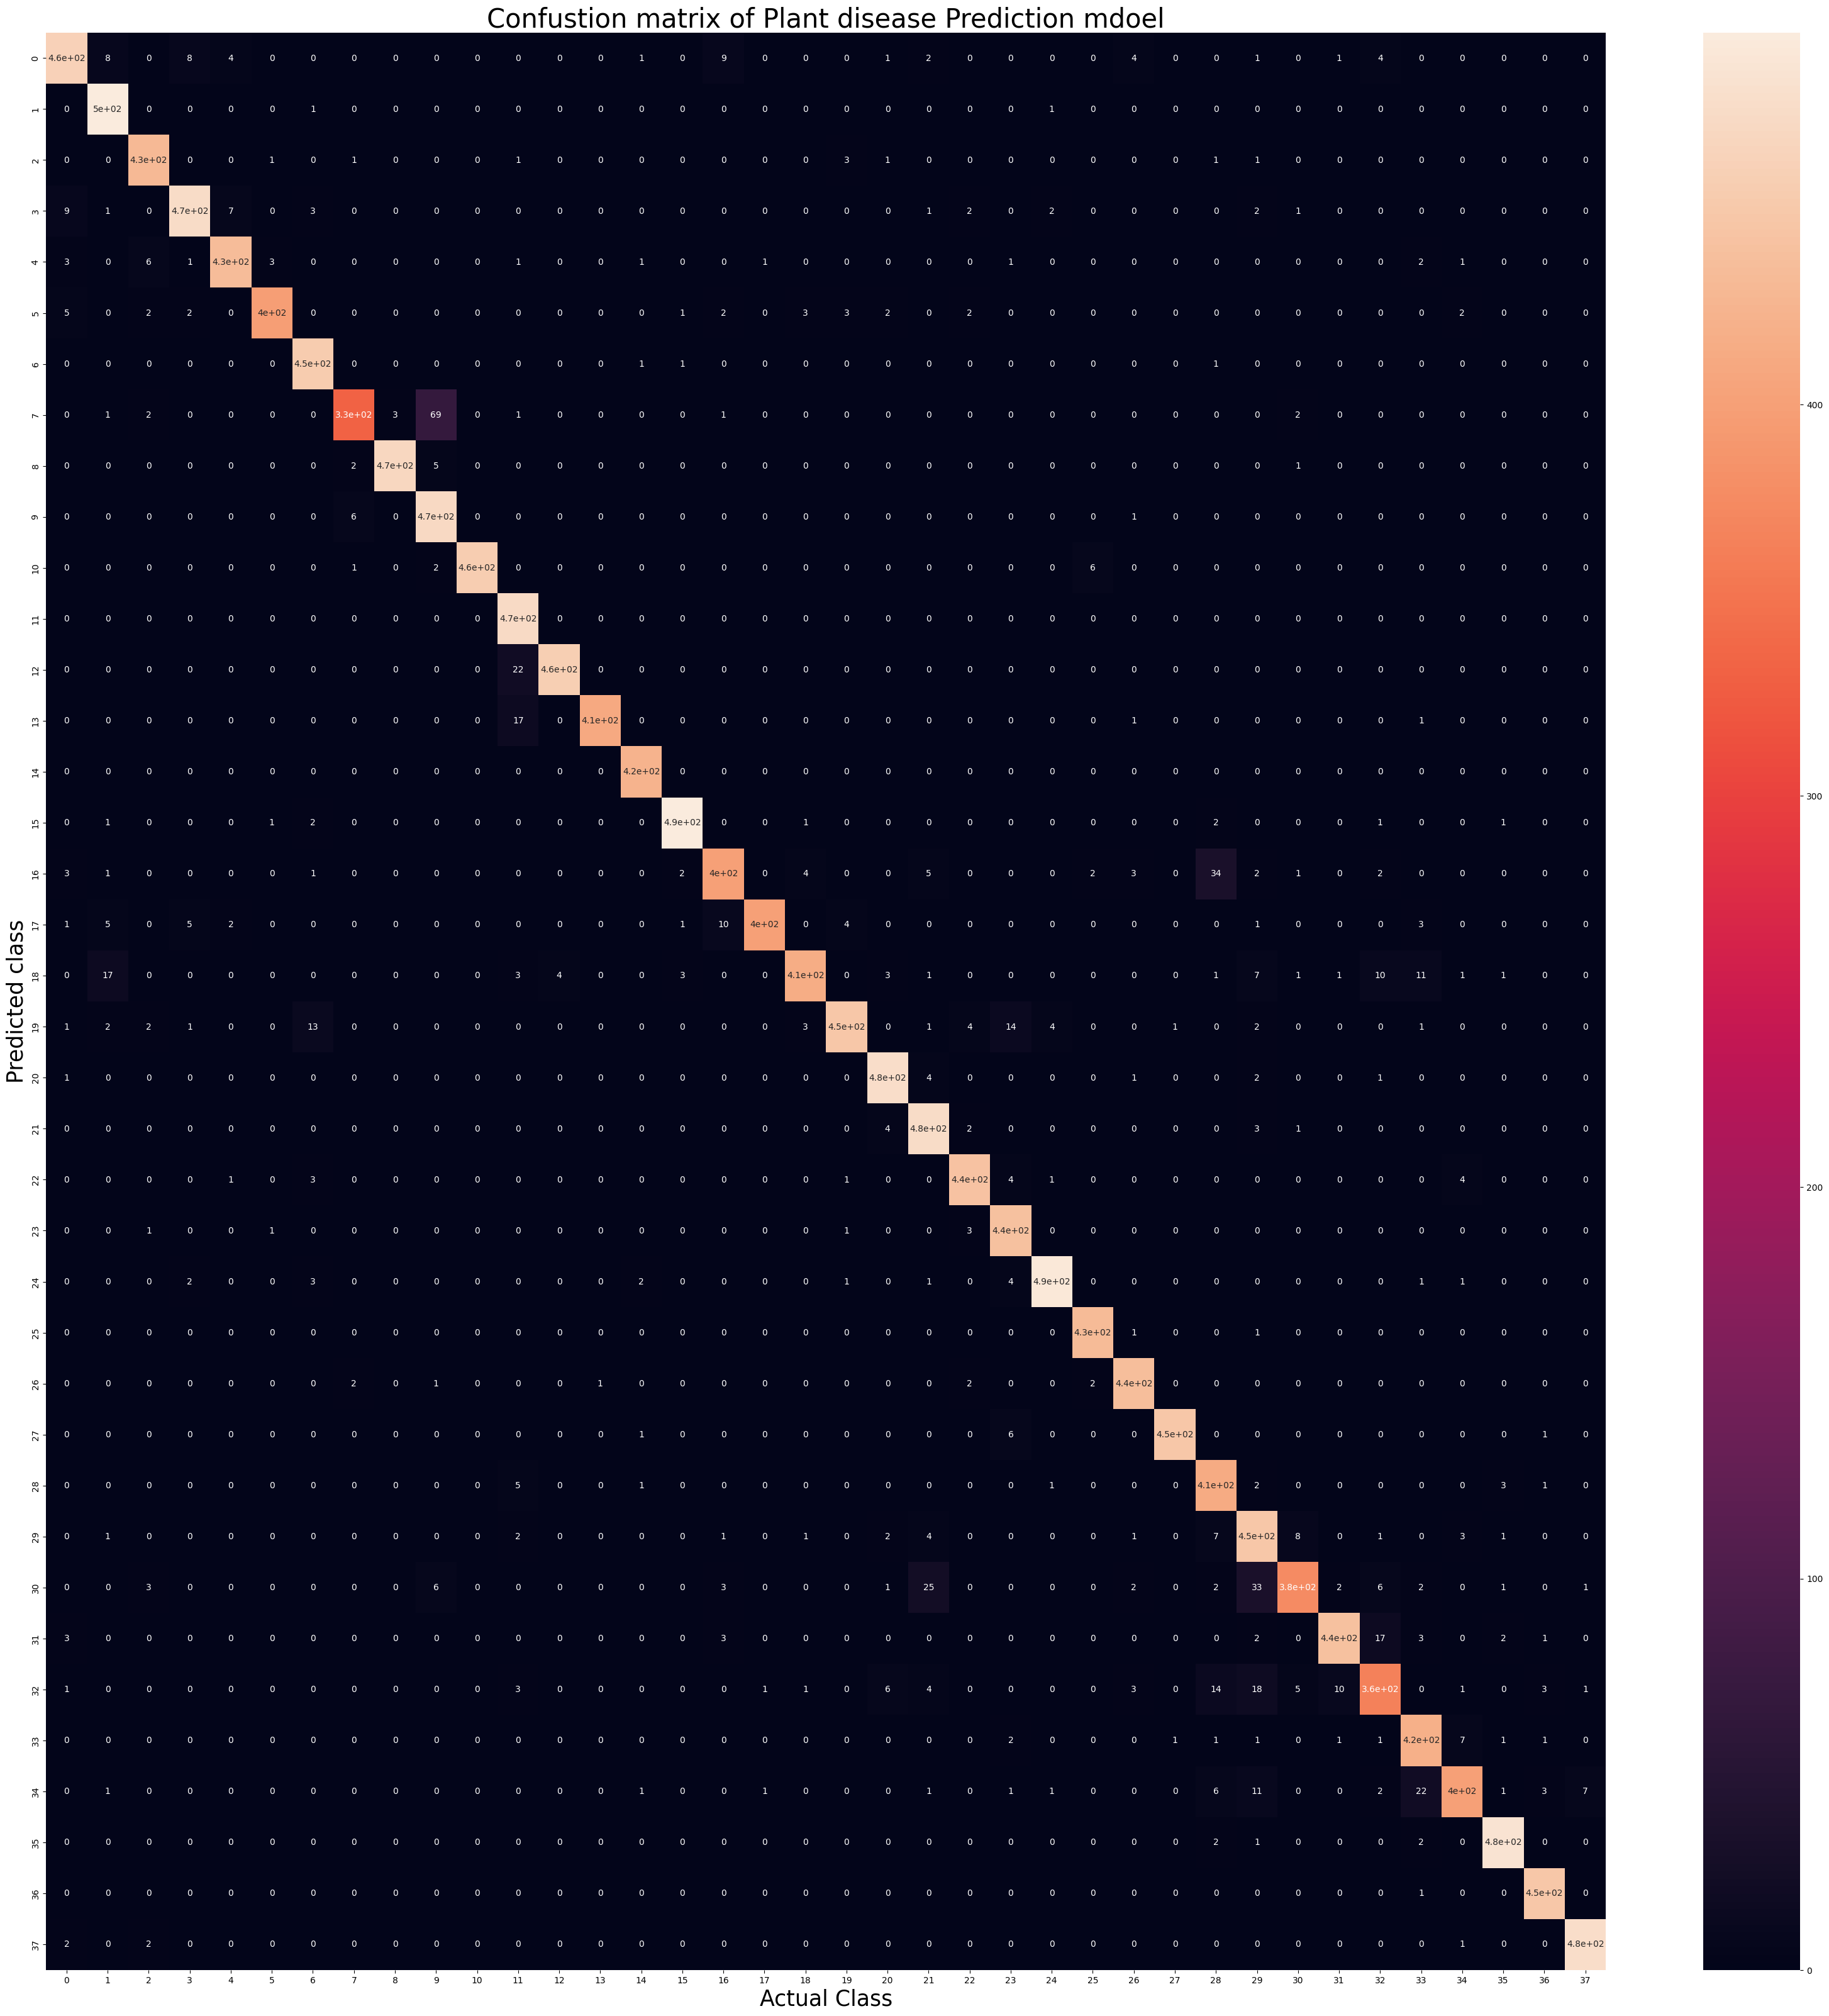

In [106]:
# visualization of confusion metrix
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True,annot_kws={"fontsize":10})
plt.xlabel('Actual Class', fontsize=25)
plt.ylabel('Predicted class', fontsize=25)
plt.title('Confustion matrix of Plant disease Prediction mdoel',fontsize=30)
plt.show()